# XG Boost Regressor - Baseline Model

### STEP 1: IMPORTING LIBRARIES

In [63]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_squared_error
from time import time
from sklearn.metrics import r2_score
import os
from sklearn.model_selection import train_test_split
#Machine Learning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split


import xgboost as xgb

In [64]:
# Import dataset

data = pd.read_csv('kc_house_data.csv')

In [65]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [67]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [68]:
# Copying data to another dataframe df_train for our convinience so that original dataframe remain intact.
df_train=data.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [69]:
df_train.head()

,id,date,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### STEP 2: DATA CLEANING AND PREPROCESSING

In [70]:
print(len(data))

print('='*150)
# Check the number of features in the data set
print(len(data.columns))

print('='*150)
# Check the data types of each column
print(data.dtypes)

21613
21
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [71]:
# Check any number of columns with NaN or missing values
print(data.isnull().any().sum(), ' / ', len(data.columns))

0  /  21


In [72]:
# Check any number of data points with NaN
print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  21613


### STEP 3 : FINDING CORRELATION

In [73]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

In [74]:
# Finding Correlation of price with other variables to see how many variables are strongly correlated with price
correlations = {}
for f in features:
    data_temp = data[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [75]:
# Printing all the correlated features value with respect to price which is target variable
# Checking Corelation with price
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


### STEP 4 : EDA or DATA VISUALIZATION

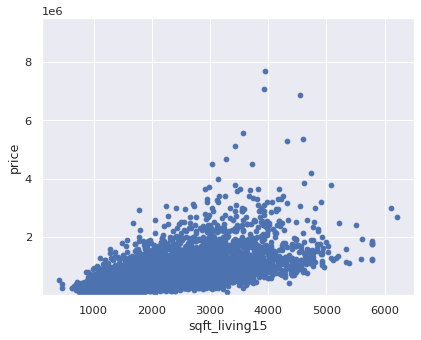

In [76]:
var = 'sqft_living15'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,9500000));

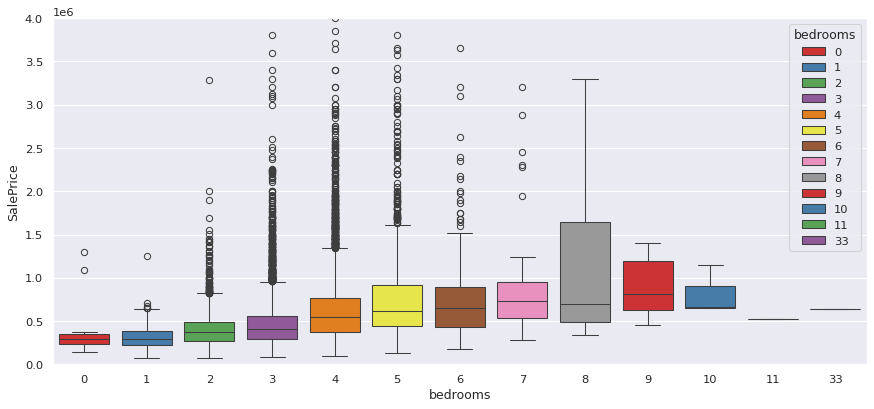

In [77]:
var = 'bedrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data , palette = 'Set1' , hue='bedrooms')
fig.axis(ymin=0, ymax=4000000);

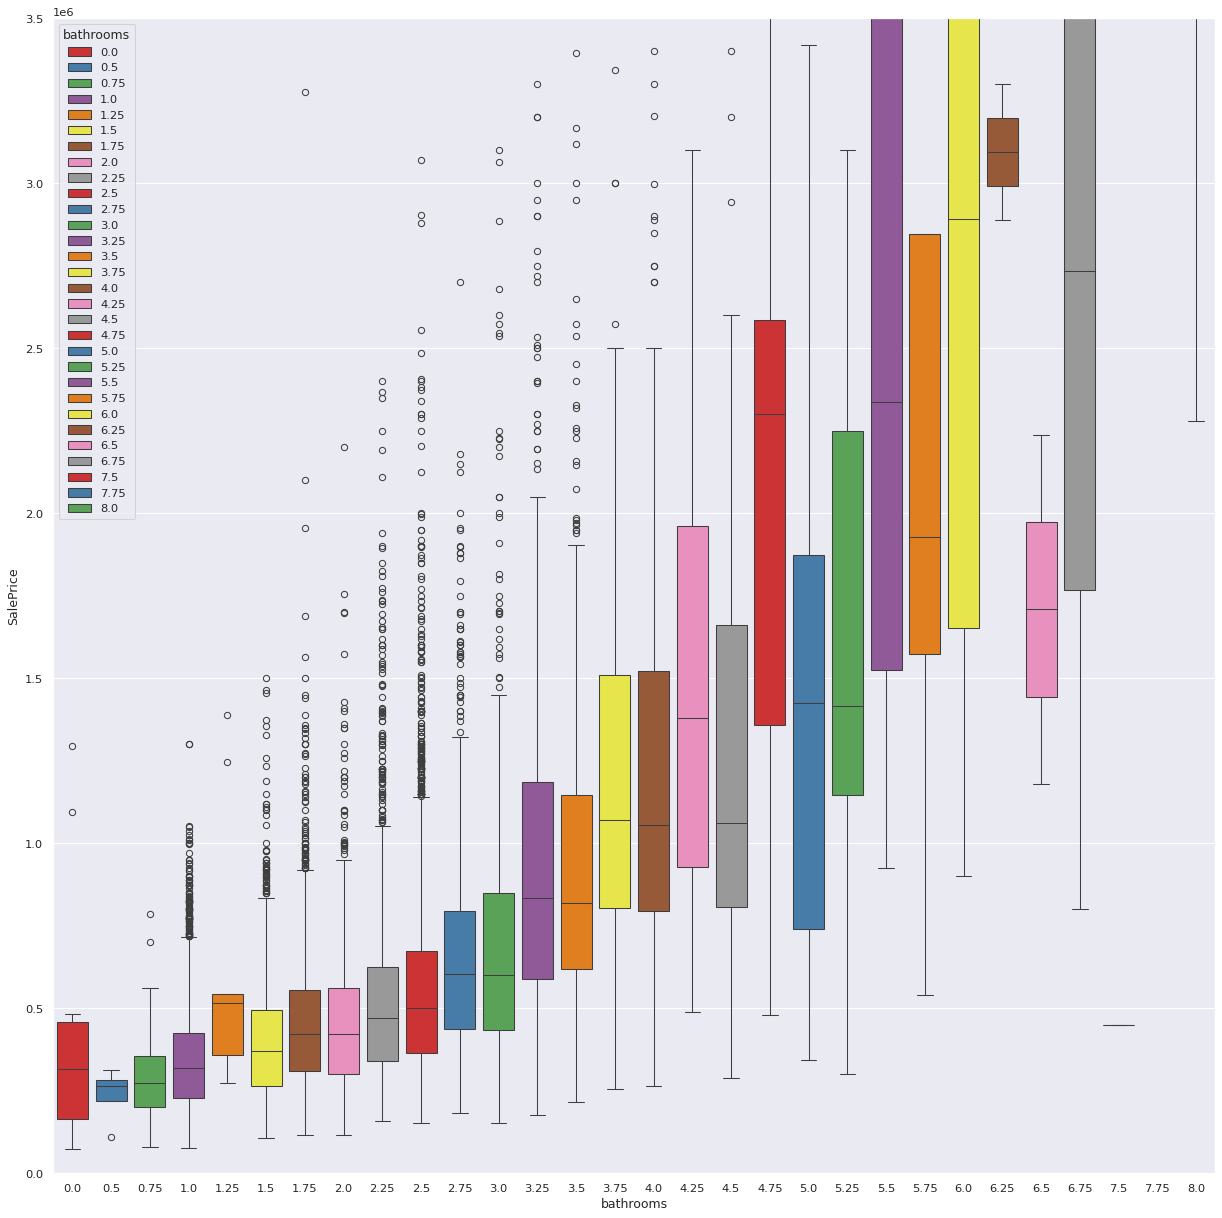

In [78]:
var = 'bathrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data , palette = 'Set1' , hue='bathrooms')
fig.axis(ymin=0, ymax=3500000);

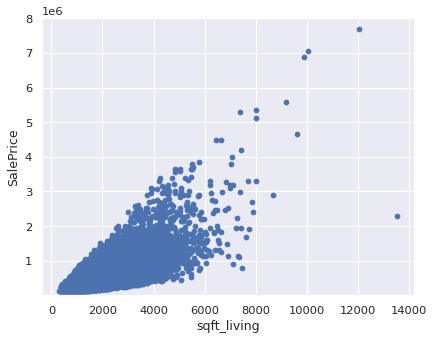

In [79]:
var = 'sqft_living'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(3,8000000));

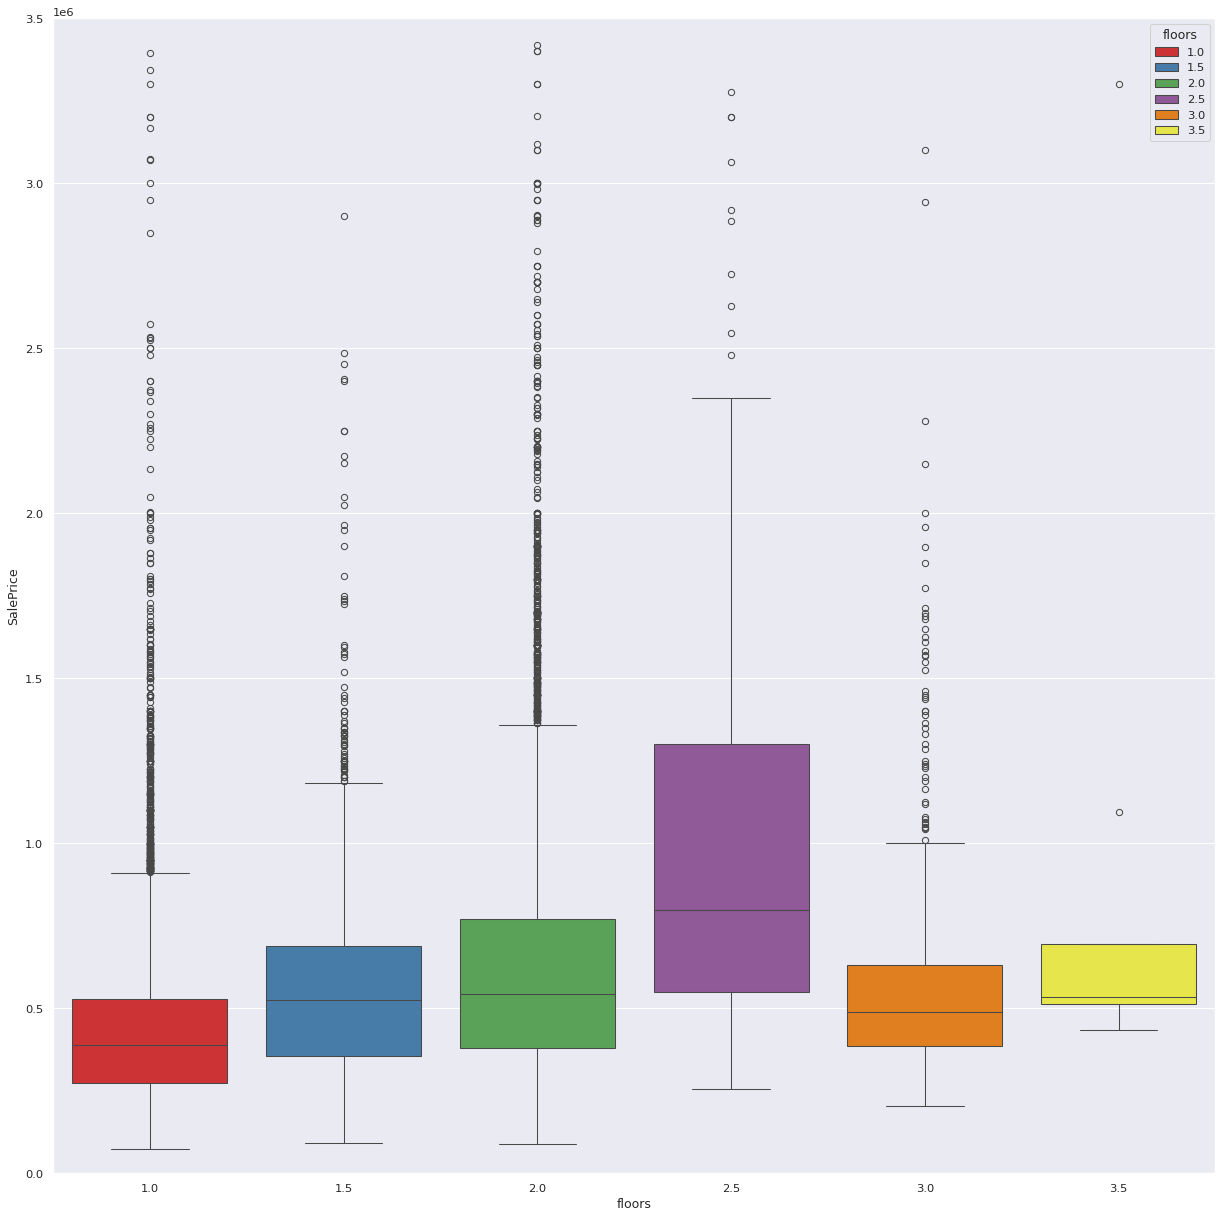

In [80]:
var = 'floors'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data , palette='Set1' , hue='floors')
fig.axis(ymin=0, ymax=3500000);

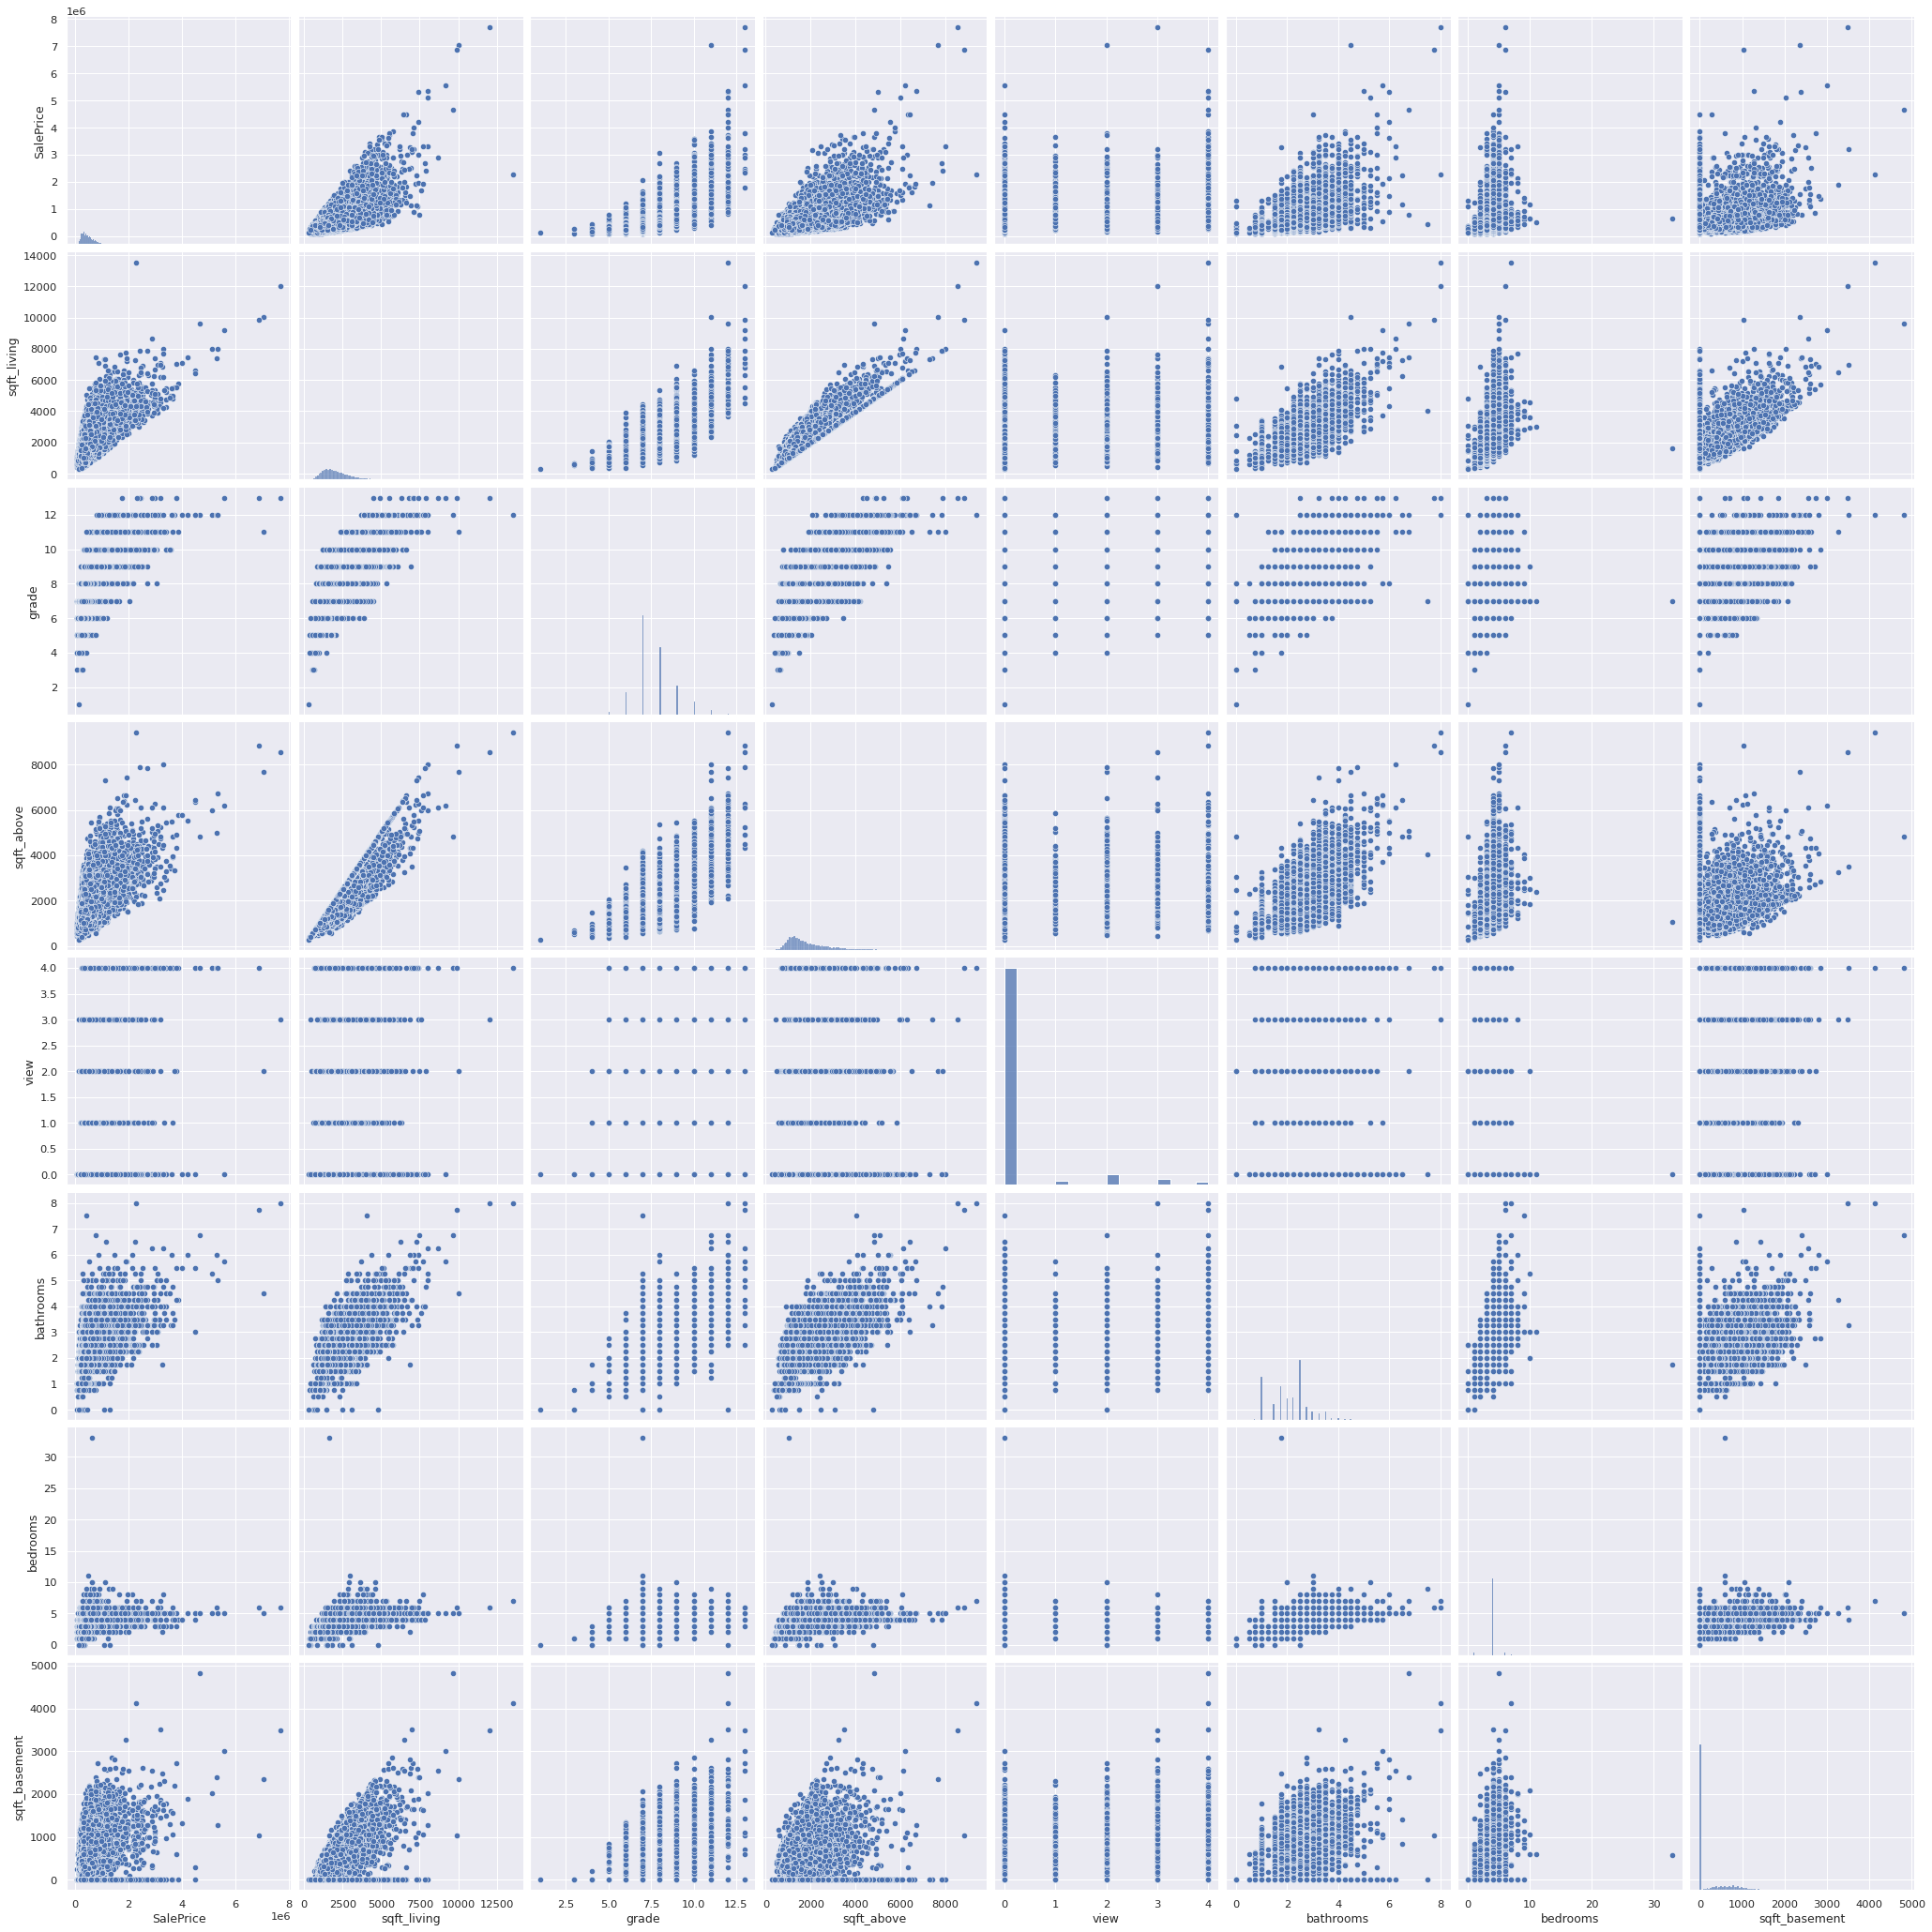

In [81]:
#Pairplots to visualize strong correlation
sns.set()
cols = ['SalePrice', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show();

In [82]:
df_train.dtypes

,0
id,int64
date,object
SalePrice,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64


In [83]:
X = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]
y = df_train[['SalePrice']]

In [84]:
X.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
0,1180,7,1180,1340,1.00,0,0,0,1955,47.5112,3,-122.257
1,2570,7,2170,1690,2.25,0,400,0,1951,47.7210,3,-122.319
2,770,6,770,2720,1.00,0,0,0,1933,47.7379,2,-122.233
3,1960,7,1050,1360,3.00,0,910,0,1965,47.5208,4,-122.393
4,1680,8,1680,1800,2.00,0,0,0,1987,47.6168,3,-122.045


In [85]:
y.head()

,SalePrice
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


### STEP 5 : SPLITTING DATA INTO TRAINING AND TESTING SET

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [87]:
X_train.shape , X_test.shape

((17290, 12), (4323, 12))

### STEP 6: APPLYING MACHINE LEARNING MODEL

# Xgboost Regression

The most important parameters -

1.n_estimators - No of Trees in the Model

2.max_leaf_nodes = The maximum number of terminal nodes or leaves in a tree. If this is defined, max_depth will be ignored

3.min_child_weight - Defines the minimum sum of weights of all observations required in a child.

4.max_depth - Maximum Depth of Tree and can be used to control overfiting

5.subsample- The fraction of samples to be used for fitting the individual base learners

6.learning_rate - Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators

In [88]:
xgb_reg = xgb.XGBRegressor(n_jobs = -1) # default paramters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [89]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
pred = xgb_reg.predict(X_test)

r2score = r2_score(pred,y_test)

In [91]:
pred

array([442621.78, 352035.53, 421916.72, ..., 359062.53, 355378.9 ,
       288723.03], dtype=float32)

In [92]:
# Calculating R2 Score
r2score

0.8863949179649353

In [93]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, pred)

rmse = math.sqrt(mse)

print(rmse)

118751.86104592927


## Hyperparameter Optimization  - Random Search for Xgboost Regression

In [94]:
# A parameter grid for XGBoost
params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 3

param_comb = 100

random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, n_jobs=-1, cv=3, verbose=3, random_state=42)

In [95]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 5],
                                        'learning_rate': [0.01, 0.02, 0.05, 0.1,
                                                          0.25],
                                        'max_depth': [3, 4, 5, 10, 12],
                                        'min_child_weight': [1, 5, 7, 10],
                                        'n_estimators': [100, 200, 500, 750],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=3)

In [96]:
random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 750,
 'min_child_weight': 10,
 'max_depth': 10,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 0.6}

In [97]:
pred_hpt = random_search.predict(X_test)

r2score = r2_score(pred_hpt,y_test)

In [98]:
pred_hpt

array([477977.06, 325444.7 , 437782.94, ..., 407838.62, 367999.6 ,
       309690.4 ], dtype=float32)

In [99]:
r2score

0.8935056328773499

In [100]:
# Calculating Mean Sqaured Error & Root Mean Squared Error
mse = mean_squared_error(y_test, pred_hpt)

rmse = math.sqrt(mse)

print(rmse)

110933.04999272576


In [103]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400 #high res figures
import shap

In [104]:
%time explainer = shap.explainers.Tree(xgb_reg, data=X_test)

CPU times: user 57.7 ms, sys: 921 µs, total: 58.6 ms
Wall time: 59.9 ms


In [105]:
%time shap_values = explainer(X_test)

 98%|===================| 4217/4323 [00:18<00:00]       

CPU times: user 18.2 s, sys: 51.6 ms, total: 18.2 s
Wall time: 18.3 s


In [106]:
shap_values

.values =
array([[ -95435.49862968,  -45883.56258923,   -8531.96221561, ...,
         101308.83277344,    1919.89760647,     673.12359684],
       [ -22013.14160179,  -27585.59743225,   -7676.69267574, ...,
        -131574.79517685,    2137.39673256,   13640.34582474],
       [ -27702.50684448,  -13411.78070282,  -12514.40047432, ...,
          15509.56363956,     329.92374596,  -19950.92571991],
       ...,
       [ -44931.46176052,  -66685.20791729,   -5431.89620682, ...,
         -26057.92090992,    1795.5384079 ,  -24343.76726074],
       [-144097.62771935,  -12463.80606575,  -52974.20272293, ...,
          57603.17430012,    6612.66534523,   14876.08188416],
       [  23107.44835934,    -278.55720619,   21927.58259575, ...,
        -248988.89355255,   -4971.97200073,    7361.59174271]])

.base_values =
array([530595.20242092, 530595.20242092, 530595.20242092, ...,
       530595.20242092, 530595.20242092, 530595.20242092])

.data =
array([[ 1.24000e+03,  7.00000e+00,  1.24000e+03, 

In [107]:
X_test

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
18131,1240,7,1240,1440,1.50,0,0,0,1959,47.5849,3,-122.170
11872,1800,7,1800,1870,2.25,0,0,0,1995,47.3879,3,-122.032
4239,1689,8,1689,1459,3.25,0,0,0,2008,47.7174,3,-122.317
6732,1670,7,1170,1960,2.50,0,500,0,1960,47.6150,3,-122.117
18860,3310,9,3310,3230,2.75,0,0,0,1998,47.7249,4,-122.027
...,...,...,...,...,...,...,...,...,...,...,...,...
19002,830,6,830,2030,1.00,3,0,1,1928,47.4012,2,-122.425
10251,1570,5,1570,1330,1.00,0,0,0,1922,47.3531,3,-121.982
14490,1510,7,1510,1320,1.75,0,0,0,1920,47.5350,4,-122.359
19795,980,8,670,980,2.50,0,310,0,2009,47.5874,2,-122.386


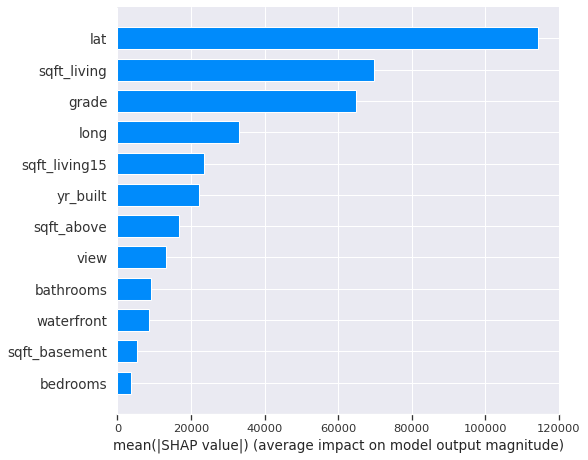

CPU times: user 271 ms, sys: 185 ms, total: 457 ms
Wall time: 270 ms


In [109]:
%%time
mpl.rcParams['figure.dpi'] = 75
shap.summary_plot(shap_values.values, X_test , plot_type='bar')